In [36]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import pyfits
import math

import astropy.io.fits as fits
%matplotlib inline


#Abrimos el .fits observamos header
hdulist=fits.open('TauOri_2016-11-19_02-54-50_final.fits','readonly', memmap=False)
hdulist.info()
hdulist.close()
hdulist[0].header

Filename: TauOri_2016-11-19_02-54-50_final.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      41   (1024, 41, 11)   float64   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                   41                                                  
NAXIS3  =                   11                                                  
EXTEND  =                    T                                                  
DATE-OBS= '2016-11-19T02:54:50'                                                 
EXPTIME =                600.0                                                  
EXPOSURE=                600.0                                                  
SET-TEMP=                -35.0                                                  
CCD-TEMP=                -35.0                                                  
XPIXSZ  =                 24

The .fits files are data cubes with dimensions (10,nords,npix), where nords are the total number of processed echelle orders, and npix in the number of pixels in the dispersion direction. The ten entries in the first dimension correspond to:

0.  Wavelength
1.  Extracted Flux
2.  Measurement of the error in the extracted flux [1./sqrt(Var)]
3.  Blaze corrected Flux
4.  Measurement of the error in the blaze corrected flux
5.  Continuum normalized flux
6.  Measurement of the error in the continuum normalized flux
7.  Estimated continuum
8.  Signal-to-noise ratio
9.  Continumm normalized flux multiplied by the derivative of the wavelength with respect to the pixels
10. Corresponding error of the 9th entrance

https://github.com/rabrahm/ceres

In [37]:
#Cargamos cubo de datos. Creamos variables
cube_data = pyfits.getdata('TauOri_2016-11-19_02-54-50_final.fits',0)
nm=[]
flux=[]
flux_norm=[]
signoise=[]
continuum=[]

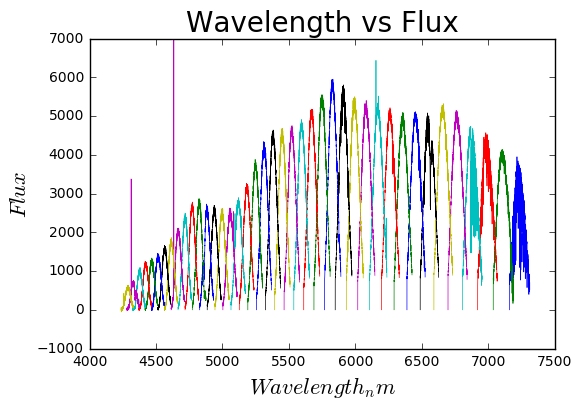

In [38]:
for i in range(41):
    nm=cube_data[0][i][:]
    flux=cube_data[1][i][:]
    plt.plot(nm,flux,linewidth=.5)
plt.title('Wavelength vs Flux', fontsize = 20)
plt.xlabel('$Wavelength_nm$',fontsize=16)
plt.ylabel('$Flux$',fontsize=16)
plt.show()

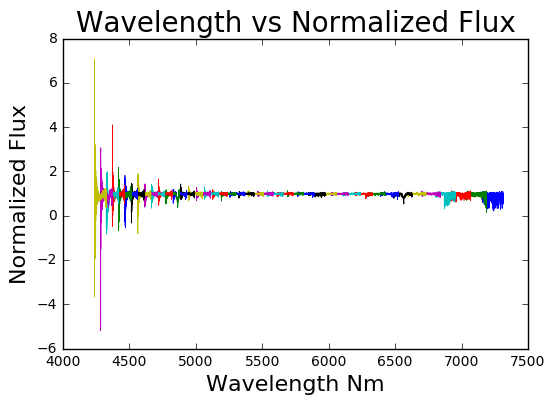

In [20]:
for i in range(41):
    nm=cube_data[0][i][:]
    flux_norm=cube_data[5][i][:]
    plt.plot(nm,flux_norm,linewidth=.5)
plt.title('Wavelength vs Normalized Flux', fontsize = 20)
plt.xlabel('Wavelength Nm',fontsize=16)
plt.ylabel('Normalized Flux',fontsize=16)
plt.show()   

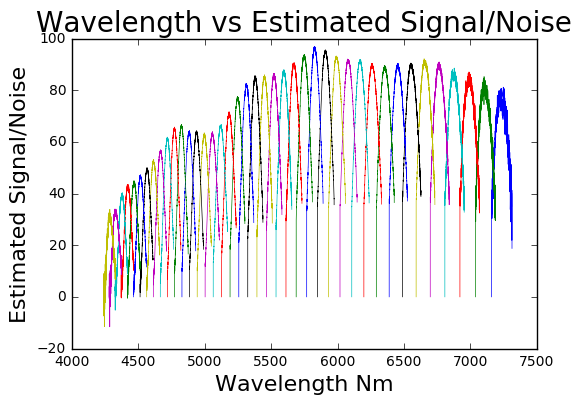

In [21]:
for i in range(41):
    nm=cube_data[0][i][:]
    signoise=cube_data[8][i][:]
    plt.plot(nm,signoise,linewidth=.5)
plt.title('Wavelength vs Estimated Signal/Noise', fontsize = 20)
plt.xlabel('Wavelength Nm',fontsize=16)
plt.ylabel('Estimated Signal/Noise',fontsize=16)
plt.show()   

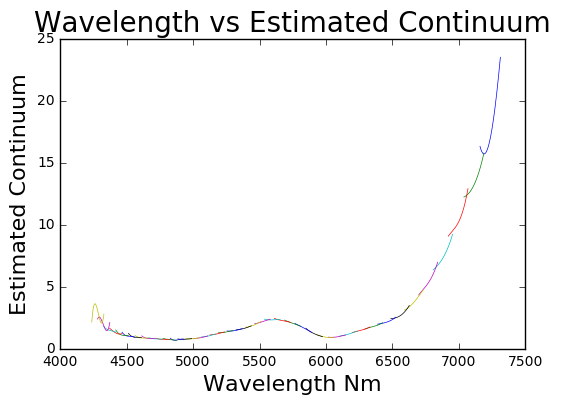

In [22]:
for i in range(41):
    nm=cube_data[0][i][:]
    continuum=cube_data[7][i][:]
    plt.plot(nm,continuum,linewidth=.5)
plt.title('Wavelength vs Estimated Continuum', fontsize = 20)
plt.xlabel('Wavelength Nm',fontsize=16)
plt.ylabel('Estimated Continuum',fontsize=16)
plt.show()   

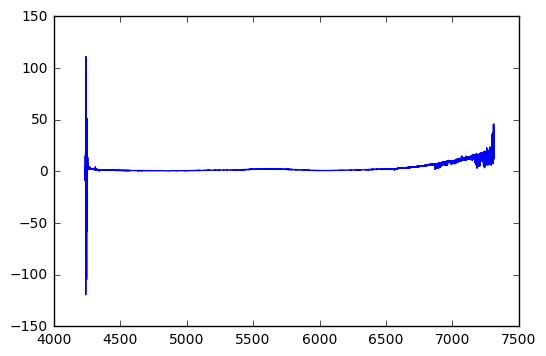

In [39]:
#Espectro Texto

f2 = open('TauOri_2016-11-19_02-54-50.spec1d.txt', 'r')
lines = f2.readlines()
f2.close()

x1 = []
y1 = []

for line in lines:
    p = line.split()
    x1.append(float(p[0]))
    y1.append(float(p[1]))  
    
xv = np.array(x1)
yv = np.array(y1)
plt.plot(xv, yv)

plt.show()

In [40]:
normalized_data=fits.open('TauOri_2016-11-19_02-54-50.spec1d.fits','readonly', memmap=False)
normalized_data.info()
normalized_data.close()
normalized_data[0].header

Filename: TauOri_2016-11-19_02-54-50.spec1d.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   (24793, 3)   float64   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                24793                                                  
NAXIS2  =                    3                                                  
EXTEND  =                    T                                                  

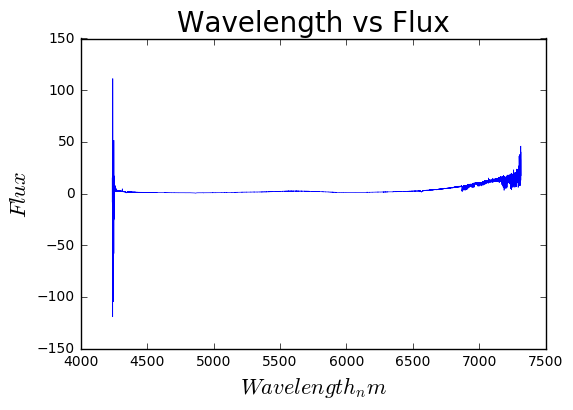

In [41]:
normalized_data = pyfits.getdata('TauOri_2016-11-19_02-54-50.spec1d.fits',0)
wave=normalized_data[0][:]
normalized=normalized_data[1][:]

plt.plot(wave,normalized,linewidth=.5)
plt.title('Wavelength vs Flux', fontsize = 20)
plt.xlabel('$Wavelength_nm$',fontsize=16)
plt.ylabel('$Flux$',fontsize=16)
plt.show()

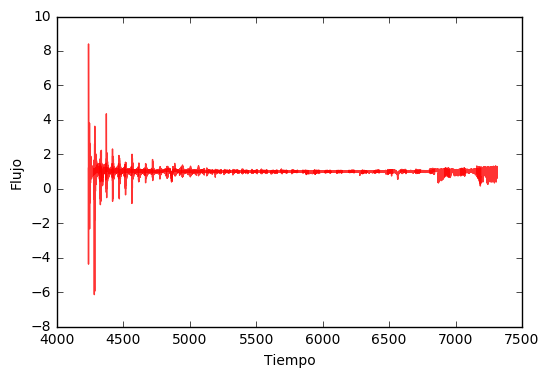

In [42]:
#Normalizacion por sectores, distintos ordenes
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
for i in range(41):
    nm = cube_data[0][i][:]
    flux=cube_data[5][i][:]    
    I = np.where(np.isnan(flux)==False)[0]  
    plt.plot(nm,flux/np.mean(flux[I]), alpha=0.8,color='red') # Dividimos el flujo por la media de un trozo dado
plt.show()

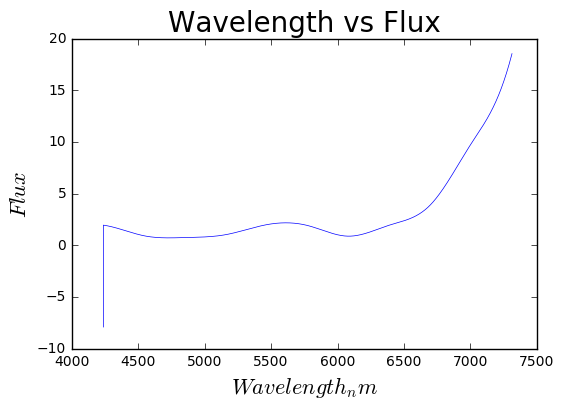

In [43]:
#FITEO

from scipy.interpolate import splrep,splev
# First define the number of knots. Let's put, say, 10 knots:
nknots = 10
# Now we crate the array of knots:
knots = np.arange(xv[1],xv[len(xv)-1],(xv[len(xv)-1]-xv[1])/np.double(nknots))
tck = splrep(xv,yv,t=knots)
fit = splev(xv,tck)

plt.plot(xv,fit,linewidth=.5)
plt.title('Wavelength vs Flux', fontsize = 20)
plt.xlabel('$Wavelength_nm$',fontsize=16)
plt.ylabel('$Flux$',fontsize=16)
plt.show()

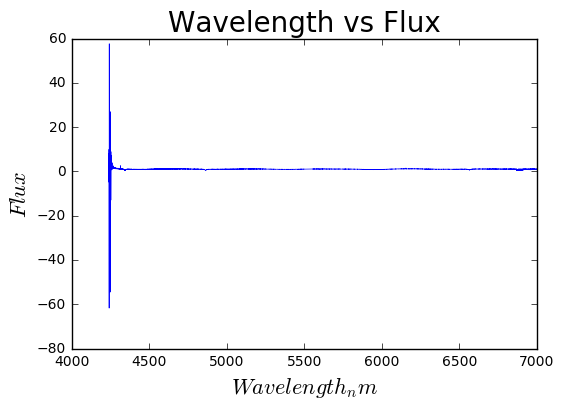

In [51]:
#NORMALIZED
from pylab import *
ion()
normalized=yv/fit

plt.plot(xv,normalized,linewidth=.5)
plt.title('Wavelength vs Flux', fontsize = 20)
plt.xlabel('$Wavelength_nm$',fontsize=16)
plt.ylabel('$Flux$',fontsize=16)
plt.xlim(4000,7000)
plt.show()

In [ ]:
from astropy.table import Table

cube_data = pyfits.getdata('TauOri_2016-11-19_02-54-50_final.fits',0)
table1 = Table.read('TauOri_2016-11-19_02-54-50.spec1d.txt', format='ascii')
table1

In [24]:
img = np.zeros((len(table)))

for col1,col2 in table:             
    img[col1] = col2
               
fits.writeto('TauOriSpectra_2016-11-19_02-54-50.fits', img)

using a non-integer number instead of an integer will result in an error in the future
using a non-integer number instead of an integer will result in an error in the future
using a non-integer number instead of an integer will result in an error in the future
using a non-integer number instead of an integer will result in an error in the future
using a non-integer number instead of an integer will result in an error in the future
using a non-integer number instead of an integer will result in an error in the future
using a non-integer number instead of an integer will result in an error in the future
using a non-integer number instead of an integer will result in an error in the future
using a non-integer number instead of an integer will result in an error in the future
using a non-integer number instead of an integer will result in an error in the future
using a non-integer number instead of an integer will result in an error in the future
using a non-integer number instead of an in

IOError: File 'TauOriSpectra_2016-11-19_02-54-50.fits' already exists.

In [37]:
from astropy.table import Table
import sys

t = table1.read(sys.argv[1], format='ascii')

t.write(sys.argv[2], format='fits')

IOError: [Errno 2] No such file or directory: '-f'

In [27]:
hdulist=fits.open('TauOriSpectra_2016-11-19_02-54-50.fits','readonly', memmap=False)
hdulist.info()
hdulist.close()
hdulist[0].header

Filename: TauOriSpectra_2016-11-19_02-54-50.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       5   (24793,)     float64   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                24793                                                  
EXTEND  =                    T                                                  

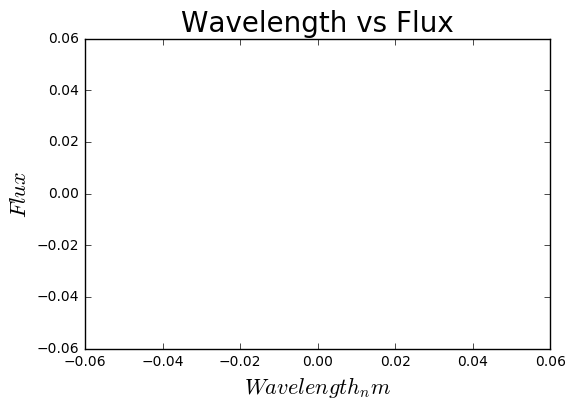

In [28]:
data = pyfits.getdata('TauOriSpectra_2016-11-19_02-54-50.fits',0)
wave=data[0]
normalized=data[1]

plt.plot(wave,normalized,linewidth=.5)
plt.title('Wavelength vs Flux', fontsize = 20)
plt.xlabel('$Wavelength_nm$',fontsize=16)
plt.ylabel('$Flux$',fontsize=16)
plt.show()

In [29]:
data

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])